In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
V1 = 100 #L
V2 = 100 #L
Qin = 10 #L/min
Q12 = 8 #L/min
Qout = 1 #L/min
Cin = 1 #g/L

#EDO Concentracao Tanque 1: dC1(t)/dt = (Qin/V1) * (Cin - C1) - (Q12/V1) * C1

#EDO Concentracao Tanque 2: dC2(t)/dt = (Q12/V2) * (C1 - C2) - (Qout/V2) * C2

In [32]:
N = 1000
t0 = 0.0
tf = 100
t = np.linspace(t0, tf, N)

In [33]:
dt = t[1] - t[0]

C1 = np.zeros(N)
C1[0] = 0
           
for n in range(N - 1):
    temp = ((Qin / V1) * (Cin - C1[n])) - ((Q12/V1) * C1[n])
    C1[n + 1] = C1[n] + (dt * temp)

In [34]:
C2 = np.zeros(N)
C2[0] = 0 #Considerando que a concentração inicial no tanque 2 é 0
           
for n in range(N - 1):
    temp = ((Q12 / V2) * (C1[n] - C2[n])) - ((Qout/V2) * C2[n])
    C2[n + 1] = C2[n] + (dt * temp)

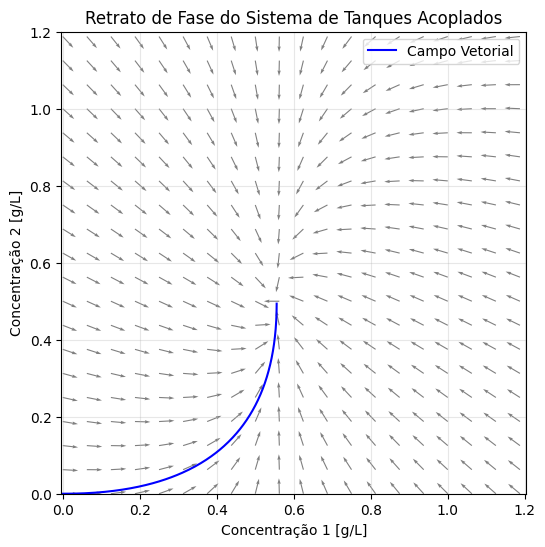

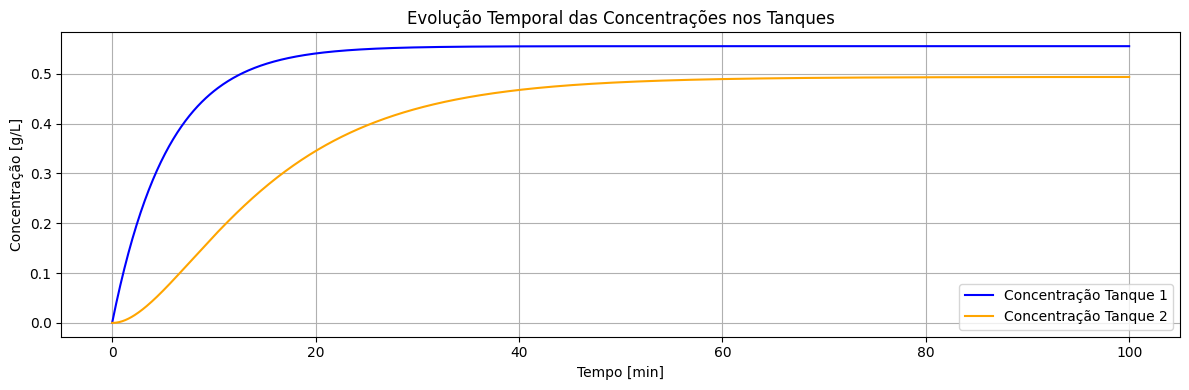

In [35]:
def vector_field_C1(C1):
    dC1dt = ((Qin / V1) * (Cin - C1)) - ((Q12/V1) * C1)
    return dC1dt

def vector_field_C2(C1, C2):
    dC2dt = ((Q12 / V2) * (C1 - C2)) - ((Qout/V2) * C2)
    return dC2dt

plt.figure(figsize=(6, 6))

C1_vals = np.linspace(0, 1.5, 25)
C2_vals = np.linspace(0, 1.5, 25)
C_1, C_2 = np.meshgrid(C1_vals, C2_vals)
dC1dt = vector_field_C1(C_1)
dC2dt = vector_field_C2(C_1, C_2)

magnitudes = np.sqrt(dC1dt**2 + dC2dt**2)
magnitudes[magnitudes == 0] = 1
dC1dt_norm = dC1dt / magnitudes
dC2dt_norm = dC2dt / magnitudes

plt.quiver(C_1, C_2, dC1dt_norm, dC2dt_norm, 
           color = 'gray', angles = 'xy', scale_units = 'xy', scale = 25)
plt.plot(C1, C2, 'b', linewidth = 1.5, label='Campo Vetorial')
plt.xlabel('Concentração 1 [g/L]')
plt.ylabel('Concentração 2 [g/L]')
plt.title('Retrato de Fase do Sistema de Tanques Acoplados')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.axis('equal')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])

plt.figure(figsize=(12, 4))
plt.plot(t, C1,'b', label='Concentração Tanque 1')
plt.plot(t, C2,'orange', label='Concentração Tanque 2')
plt.xlabel('Tempo [min]')
plt.ylabel('Concentração [g/L]')
plt.title('Evolução Temporal das Concentrações nos Tanques')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
plt.show()

Simulando a resposta temporal do sistema através do Método de Euler e analisando o Retrato de Fase do Sistema de Tanques Acoplados e a Evolução Temporal das Concentrações nos Tanques 1 e 2, é possível concluir que este sistema tende ao equilíbrio em torno da concentração de 0,53 g/L para o tanque 1 e 0,49 g/L para o tanque 2.